In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import scipy.cluster.hierarchy as sch

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
cancer = pd.read_csv("mRNA_luad_cancer_selected_features_with_stage.txt")
cancer = cancer.drop(columns=['Unnamed: 0'])
cancer = cancer[cancer['AJCC_PATHOLOGIC_TUMOR_STAGE'].notna()]
cancer.head()

,SAMPLE_ID,TP53,LRP1B,KRAS,PCLO,KEAP1,CDKN2A,CDKN2B,PTPRD,FAT4,...,MYD88,DNAJB1,TAL2,VHL,RRAS,SUFU,YPEL5,CNBP,CANCER,AJCC_PATHOLOGIC_TUMOR_STAGE
0,TCGA-05-4244-01,1.8485,-1.3344,3.3122,-1.1040,0.4341,0.3579,-4.9171,-4.9219,-2.6989,...,-0.6545,0.7177,-0.4452,0.7018,-3.8643,-1.0992,0.0804,-1.6262,1,4.0
1,TCGA-05-4249-01,5.1031,-2.1999,7.8642,-2.0559,0.9739,3.9552,-1.1988,-1.2415,-1.8269,...,-0.0951,-1.1713,-2.1687,0.9997,-5.5307,1.8450,0.1412,-1.3173,1,1.0
2,TCGA-05-4250-01,-5.6229,-0.0825,7.9838,0.3692,-0.5459,5.6423,-3.8793,-2.9943,-2.9824,...,-0.9910,0.9927,1.0133,0.2920,-2.5057,-0.3163,-0.3269,0.2893,1,3.0
3,TCGA-05-4382-01,1.8033,-2.1999,2.2266,-0.2955,-1.3722,5.3724,-1.5561,-1.6959,-2.7915,...,0.6844,-1.9892,0.0170,0.9279,-1.5677,0.7067,-1.6269,-0.4259,1,1.0
4,TCGA-05-4384-01,3.8977,2.5339,1.2420,1.0984,1.0324,1.9087,-2.3277,-1.7272,-1.8158,...,-0.8842,-2.9432,-2.1687,1.5310,-4.4192,1.0284,-0.4190,-0.3444,1,3.0


In [ ]:
np.any(np.isnan(cancer['AJCC_PATHOLOGIC_TUMOR_STAGE']))

False

In [ ]:
# Train Test Split Data
X= cancer.drop(columns=['AJCC_PATHOLOGIC_TUMOR_STAGE', 'CANCER', 'SAMPLE_ID'])
y = cancer['AJCC_PATHOLOGIC_TUMOR_STAGE']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123) 
# randomly assign some data to the test-set and the rest to the training-set

X_train.head()

,TP53,LRP1B,KRAS,PCLO,KEAP1,CDKN2A,CDKN2B,PTPRD,FAT4,RELN,...,CRBN,TLX1,MYD88,DNAJB1,TAL2,VHL,RRAS,SUFU,YPEL5,CNBP
20,4.6993,-0.4559,4.8267,3.7554,-2.6077,2.4274,-0.8207,-1.5060,-2.1050,0.8829,...,-2.2550,0.3591,-0.4406,0.8942,-2.1687,1.7060,-5.5418,0.1748,-1.4341,-1.6271
120,-0.2408,-1.6233,1.0026,-3.2079,0.7214,3.1468,-1.7644,-1.6125,-1.6800,-1.7355,...,0.5672,-0.6806,-0.1069,-1.0865,-2.1687,0.0437,-0.1572,-1.3713,1.3465,0.4885
191,2.0147,-2.1999,6.6439,2.6705,-7.3609,-3.5300,-4.5148,-0.0025,-2.8854,-2.6051,...,-0.6828,-1.8386,-0.5775,-2.0074,-2.1687,2.2093,-8.8750,-2.3960,-1.4239,-1.2741
172,0.2733,-2.1999,3.7152,-0.0710,0.1068,5.7091,-1.9977,-1.3615,-1.1602,-2.7072,...,-3.7549,0.3059,-1.0125,-1.3927,-2.1687,0.5045,-2.3352,-0.4369,-1.7314,-1.8550
429,1.7308,-2.1999,7.4436,1.9143,1.9509,5.6073,-3.4357,-6.3785,-0.5999,-2.5558,...,-4.8011,8.5860,-1.1870,2.2438,-0.5639,0.2103,-2.7370,0.1241,-3.4792,-1.6268


In [ ]:
# Scaling
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape

(381, 960)

array([2, 2, 2, 1, 0, 4, 0, 2, 2, 4, 1, 0, 1, 2, 1, 4, 4, 2, 2, 2, 4, 2,
       0, 3, 0, 2, 0, 0, 1, 0, 0, 1, 2, 4, 2, 0, 4, 1, 0, 2, 2, 4, 0, 0,
       1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1,
       0, 1, 4, 3, 4, 1, 1, 0, 2, 2, 0, 0, 1, 0, 0, 2, 2, 4, 2, 2, 4, 0,
       4, 0, 2, 0, 0, 1, 1, 4, 2, 3, 0, 2, 2, 2, 1, 0, 1, 0, 3, 0, 4, 4,
       2, 3, 0, 2, 0, 1, 4, 0, 0, 0, 4, 4, 3, 2, 4, 0, 2, 1, 1, 2, 2, 1,
       0, 4, 2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 2, 4, 0, 4, 4, 1, 0, 0, 1, 0,
       2, 3, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 3, 0, 0, 3, 2,
       2, 1, 0, 2, 0, 4, 0, 0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 2, 0, 0, 2,
       1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 4, 2, 1, 1, 0, 3, 1, 4, 0,
       1, 3, 0, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 0, 1, 1, 3, 2, 1, 4, 1, 0,
       1, 4, 1, 0, 1, 2, 1, 4, 2, 0, 0, 2, 2, 4, 1, 1, 0, 1, 4, 0, 2, 2,
       2, 1, 2, 2, 2, 3, 3, 0, 1, 0, 1, 1, 2, 2, 1, 0, 4, 2, 4, 2, 2, 1,
       1, 2, 1, 0, 2, 2, 3, 0, 1, 0, 2, 1, 4, 0, 1,

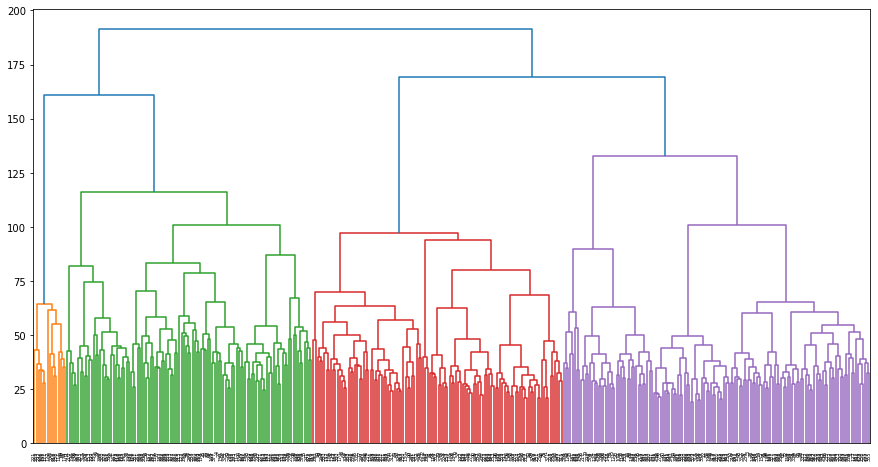

In [ ]:
fig, ax = plt.subplots()
dendrogram = sch.dendrogram(sch.linkage(X_train_scaled, method='ward'), ax=ax)
fig.set_size_inches(15, 8)
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward') # Here as use "complete" linkage
hc.fit(X_train_scaled)
hc.labels_


In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(rfc.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(rfc.score(X_test_scaled, y_test)))


# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(rfc, X_train_scaled, y_train, cv = KFold()))))

Training set score: 1.000
Test set score: 0.504
Mean Cross Validation, KFold: 0.541


In [ ]:
# Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

param_dict = {
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "n_estimators":[10, 100, 200, 500],
    "min_samples_leaf":range(1,5),
    "max_features": ['auto', 'sqrt', 'log2'],
    "oob_score": [True, False]
}

rfc_randomized = RandomizedSearchCV(rfc, param_dict, cv = KFold(), n_iter = 20, verbose = 2, n_jobs = -1, random_state = 123).fit(X_train_scaled, y_train)


print("Best Parameter: {}".format(rfc_randomized.best_params_))
print("Test set Score: {:.3f}".format(rfc_randomized.score(X_test_scaled, y_test)))

# Kfold Cross Validation
print("Best Cross-Validation Score: {:.3f}".format(rfc_randomized.best_score_))

from pprint import pprint
pprint(rfc_randomized.best_estimator_.get_params())

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/whale9707/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/whale9707/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/whale9707/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/whale9707/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/whale9707/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarn

Best Parameter: {'oob_score': False, 'n_estimators': 100, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'entropy'}
Test set Score: 0.504
Best Cross-Validation Score: 0.556
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
cancer.head()

,SAMPLE_ID,TP53,LRP1B,KRAS,PCLO,KEAP1,CDKN2A,CDKN2B,PTPRD,FAT4,...,MYD88,DNAJB1,TAL2,VHL,RRAS,SUFU,YPEL5,CNBP,CANCER,AJCC_PATHOLOGIC_TUMOR_STAGE
0,TCGA-05-4244-01,1.8485,-1.3344,3.3122,-1.1040,0.4341,0.3579,-4.9171,-4.9219,-2.6989,...,-0.6545,0.7177,-0.4452,0.7018,-3.8643,-1.0992,0.0804,-1.6262,1,4.0
1,TCGA-05-4249-01,5.1031,-2.1999,7.8642,-2.0559,0.9739,3.9552,-1.1988,-1.2415,-1.8269,...,-0.0951,-1.1713,-2.1687,0.9997,-5.5307,1.8450,0.1412,-1.3173,1,1.0
2,TCGA-05-4250-01,-5.6229,-0.0825,7.9838,0.3692,-0.5459,5.6423,-3.8793,-2.9943,-2.9824,...,-0.9910,0.9927,1.0133,0.2920,-2.5057,-0.3163,-0.3269,0.2893,1,3.0
3,TCGA-05-4382-01,1.8033,-2.1999,2.2266,-0.2955,-1.3722,5.3724,-1.5561,-1.6959,-2.7915,...,0.6844,-1.9892,0.0170,0.9279,-1.5677,0.7067,-1.6269,-0.4259,1,1.0
4,TCGA-05-4384-01,3.8977,2.5339,1.2420,1.0984,1.0324,1.9087,-2.3277,-1.7272,-1.8158,...,-0.8842,-2.9432,-2.1687,1.5310,-4.4192,1.0284,-0.4190,-0.3444,1,3.0


In [ ]:
# Now let's try if the model is more suitable if we only care about the 14 features.
# Re-Train Test Split Data
X= cancer.loc[:,['FGF12', 'PDCD11','PTCH1','CUX1','NOTCH3','KDM4C',
                     'TYRO3','DDX10','MLH1','ZNF384','SETD4','PHF1','SH3GL1','SETD7','TP53']]
y = cancer['AJCC_PATHOLOGIC_TUMOR_STAGE']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123) 
# randomly assign some data to the test-set and the rest to the training-set

X_train.head()

,FGF12,PDCD11,PTCH1,CUX1,NOTCH3,KDM4C,TYRO3,DDX10,MLH1,ZNF384,SETD4,PHF1,SH3GL1,SETD7,TP53
20,3.1604,2.8756,-0.8061,-1.7257,3.8288,-1.8251,1.9655,4.1666,1.6674,-0.2008,-0.9574,-2.8151,-0.4126,-0.5279,4.6993
120,-1.1091,-1.6431,-1.7094,-1.4846,0.7178,-0.2399,0.1852,-0.0926,0.0001,0.0641,-0.5517,0.7035,2.8070,-3.1310,-0.2408
191,-2.5620,0.8883,-0.7228,-8.0485,-1.1199,2.0437,-2.3590,1.0296,3.8021,0.0148,-2.3231,-3.1276,-9.4616,5.7365,2.0147
172,-0.0743,1.4486,-1.6647,-1.8400,1.1171,-4.9607,-0.4057,3.7316,-1.5242,1.2359,0.3908,-1.9294,2.8485,2.5361,0.2733
429,-3.8317,2.9549,-3.0968,4.6116,2.4346,-3.8588,0.0173,4.0487,-2.9077,-1.6788,-1.1465,-3.7164,5.9087,0.6347,1.7308


[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=500, oob_score=False; total time=   1.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, n_estimators=200, oob_score=True; total time=   1.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, oob_score=False; total time=   1.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, n_estimators=200, oob_score=False; total time=   0.9s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_

[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=500, oob_score=False; total time=   1.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, n_estimators=200, oob_score=True; total time=   1.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, oob_score=False; total time=   1.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, n_estimators=200, oob_score=False; total time=   1.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=500, oob_score=True; total time=   4.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=500, oob_score=False; total time=   1.6s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_le

In [ ]:
# Scaling
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape

(381, 15)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(rfc.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(rfc.score(X_test_scaled, y_test)))


# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(rfc, X_train_scaled, y_train, cv = KFold()))))

Training set score: 1.000
Test set score: 0.535
Mean Cross Validation, KFold: 0.543


In [ ]:
# Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

param_dict = {
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "n_estimators":[10, 100, 200, 500],
    "min_samples_leaf":range(1,5),
    "max_features": ['auto', 'sqrt', 'log2'],
    "oob_score": [True, False]
}

rfc_randomized = RandomizedSearchCV(rfc, param_dict, cv = KFold(), n_iter = 20, verbose = 2, n_jobs = -1, random_state = 123).fit(X_train_scaled, y_train)


print("Best Parameter: {}".format(rfc_randomized.best_params_))
print("Test set Score: {:.3f}".format(rfc_randomized.score(X_test_scaled, y_test)))

# Kfold Cross Validation
print("Best Cross-Validation Score: {:.3f}".format(rfc_randomized.best_score_))

from pprint import pprint
pprint(rfc_randomized.best_estimator_.get_params())

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/whale9707/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/whale9707/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/whale9707/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/whale9707/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/whale9707/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarn

Best Parameter: {'oob_score': False, 'n_estimators': 200, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 6, 'criterion': 'entropy'}
Test set Score: 0.504
Best Cross-Validation Score: 0.567
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, n_estimators=10, oob_score=True; total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=500, oob_score=False; total time=   0.7s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, n_estimators=200, o

[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, n_estimators=10, oob_score=True; total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=500, oob_score=False; total time=   0.7s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, n_estimators=200, oob_score=True; total time=   0.3s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, oob_score=False; total time=   0.6s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, n_estimators=10, oob_score=False; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=500, oob_score=True; total time=   0.9s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, n_estimators=100, oob_score=False; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf

In [ ]:
# There is no significsnt improvemnet in accuracy